#### Assumptions in Multilinear regression:
- Linearity: The relationship between the predicators and the response is linear
- Independence: Observations are independent of each other.
- Homoscedasticity: The residuals (differences between observed and predicted values) exhibit constant variance at all levels of the predictor
- Normal distribution of Errors: The residuals of the model are normally distributed
- No Multicollinearity: The independent variables should not be too highly correlated with each other

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
warnings.filterwarnings('ignore')

data = pd.read_csv('Cars.csv')
data.head(5)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [2]:
cars = pd.DataFrame(data,columns = ['HP','VOL','SP','WT','MPG'])
cars

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232
...,...,...,...,...,...
76,322,50,169.598513,16.132947,36.900000
77,238,115,150.576579,37.923113,19.197888
78,263,50,151.598513,15.769625,34.000000
79,295,119,167.944460,39.423099,19.833733


In [3]:
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


### Description of Columns
- MPG : Mileage of the car(mile per Gallon)
- VOL : Volume of the car(size)
- SP  : Top speed of the car(miles per hour)
- WT  : Weight of the car(Pounds)
- HP  : Horse Power of the car(Pounds)

### EDA

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.isnull().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations
- No missing data found in the table or dataset
- Datatypes provided are relavent

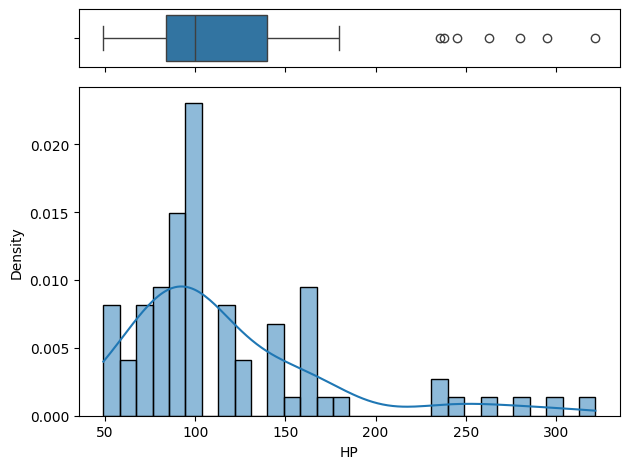

In [6]:
fig , (ax_box , ax_hist) = plt.subplots(2, sharex = True , gridspec_kw = {"height_ratios": (.15,.85)})
sns.boxplot(data = cars , x = 'HP',ax = ax_box, orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars, x = 'HP', ax = ax_hist, bins = 30 , kde = True, stat = 'density')
ax_hist.set(ylabel = 'Density')


plt.tight_layout()
plt.show()

In [7]:
val = cars.corr()
val.iloc[:,[4]]

,MPG
HP,-0.725038
VOL,-0.529057
SP,-0.687125
WT,-0.526759
MPG,1.000000


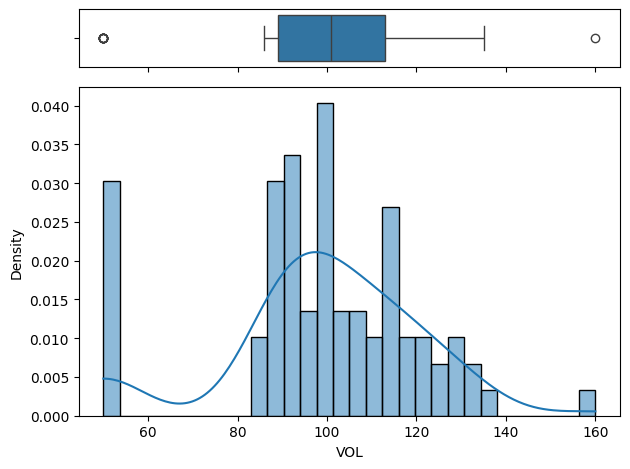

In [8]:
fig , (ax_box , ax_hist) = plt.subplots(2, sharex = True , gridspec_kw = {"height_ratios": (.15,.85)})
sns.boxplot(data = cars , x = 'VOL',ax = ax_box, orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars, x = 'VOL', ax = ax_hist, bins = 30 , kde = True, stat = 'density')
ax_hist.set(ylabel = 'Density')


plt.tight_layout()
plt.show()

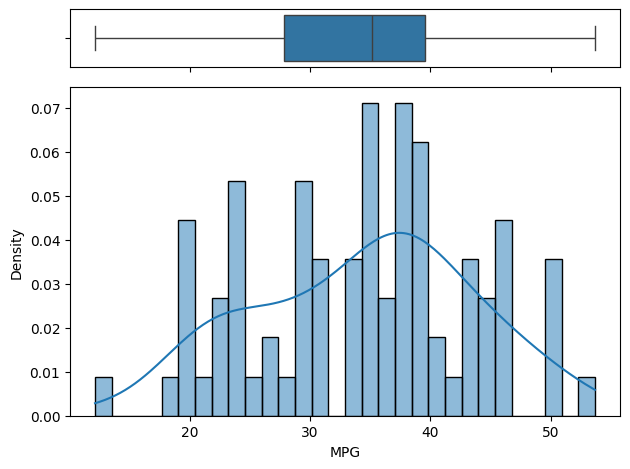

In [9]:
fig , (ax_box , ax_hist) = plt.subplots(2, sharex = True , gridspec_kw = {"height_ratios": (.15,.85)})
sns.boxplot(data = cars , x = 'MPG',ax = ax_box, orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars, x = 'MPG', ax = ax_hist, bins = 30 , kde = True, stat = 'density')
ax_hist.set(ylabel = 'Density')


plt.tight_layout()
plt.show()

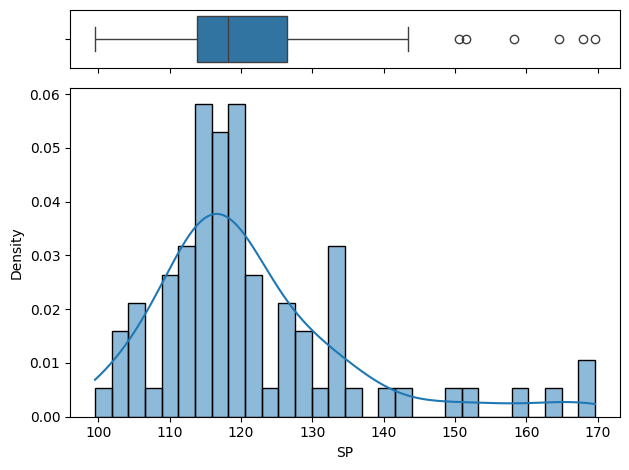

In [10]:
fig , (ax_box , ax_hist) = plt.subplots(2, sharex = True , gridspec_kw = {"height_ratios": (.15,.85)})
sns.boxplot(data = cars , x = 'SP',ax = ax_box, orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars, x = 'SP', ax = ax_hist, bins = 30 , kde = True, stat = 'density')
ax_hist.set(ylabel = 'Density')


plt.tight_layout()
plt.show()

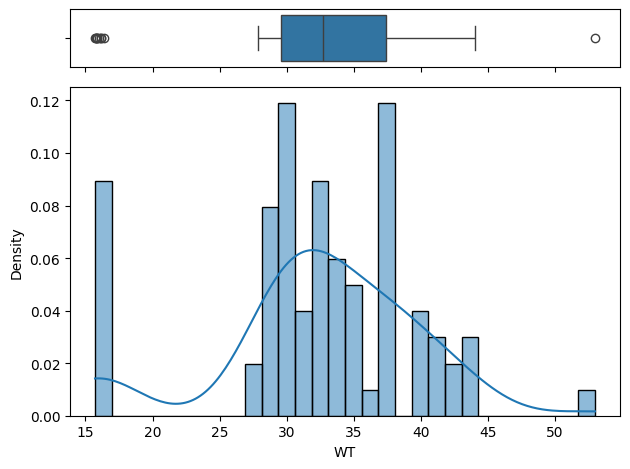

In [11]:
fig , (ax_box , ax_hist) = plt.subplots(2, sharex = True , gridspec_kw = {"height_ratios": (.15,.85)})
sns.boxplot(data = cars , x = 'WT',ax = ax_box, orient = 'h')
ax_box.set(xlabel = '')
sns.histplot(data = cars, x = 'WT', ax = ax_hist, bins = 30 , kde = True, stat = 'density')
ax_hist.set(ylabel = 'Density')


plt.tight_layout()
plt.show()

#### Observations from boxplot and histograms
- There are some extreme values (outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.
- The extreme values of the cars data may have come from the specially designed nature of cars.
- As this is the multi-dimensional data,the outliers with respect to spatial dimensions may have to be considered while building the regression model.

In [12]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


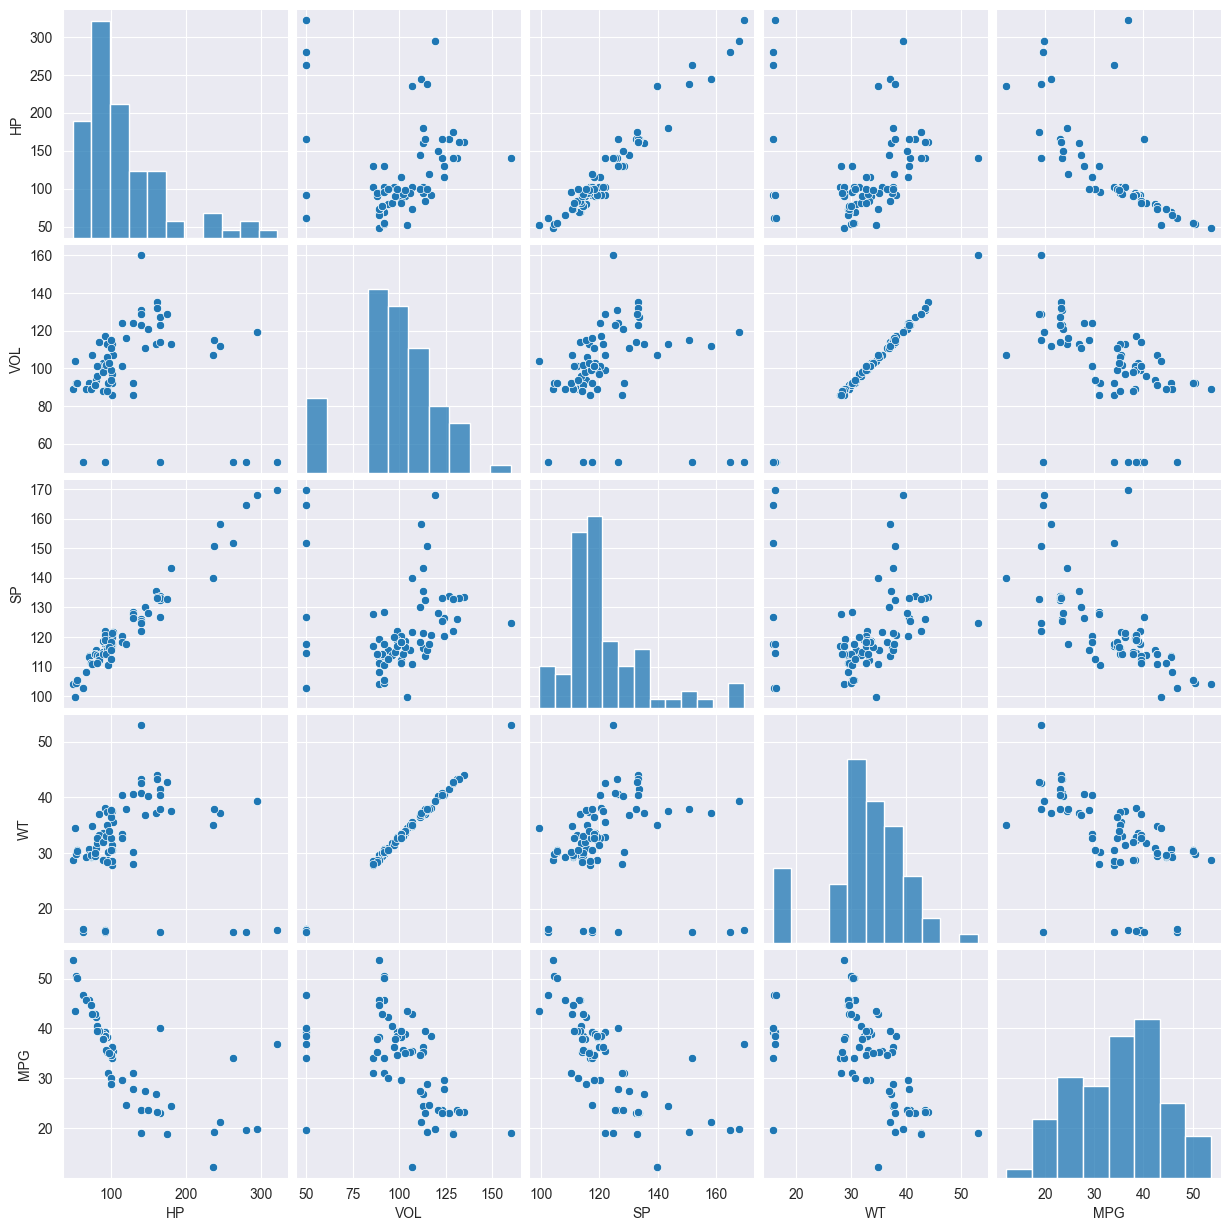

In [13]:
sns.set_style(style= 'darkgrid')
sns.pairplot(cars)

#### Observations
- MPG is always having negative correlation between all the factors in table.
- There arent many scattering in the graph of VOL and WT
- HP has one of higher correlation with the factor of SP
- VOL has highest correlation with the factor of WT almost a perfect line with 99% accuracy
- Between x and y, all the x variables are showing moderate to high correlation strengths, highest being 

In [14]:
model1 = smf.ols('MPG ~ HP + VOL + SP + WT', data=cars).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        10:53:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


#### Observations
- The R-Squared and the adjusted R-Squared values are good and about 75% of variability in Y is explained by X columns
- The probability value with respect to F-statistic is close to zero, indicating that all or someof X columns are significant
- The p-values for VOL and WT are higher than 5% indicating some interaction issue among themselves which need to be further explored

In [16]:
df1 =pd.DataFrame()
df1['actual_y1'] = cars['MPG']
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


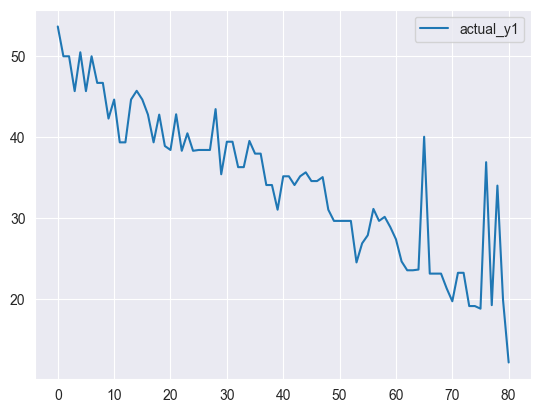

In [17]:
df1.plot()
plt.show()

In [18]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1['pred_y1'] = pred_y1

In [19]:
cars

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232
...,...,...,...,...,...
76,322,50,169.598513,16.132947,36.900000
77,238,115,150.576579,37.923113,19.197888
78,263,50,151.598513,15.769625,34.000000
79,295,119,167.944460,39.423099,19.833733


In [20]:
from sklearn.metrics import mean_squared_error as ms
mse = ms(df1['actual_y1'],df1['pred_y1'])
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))

MSE: 18.89714115234311
RMSE: 4.347084212704317


In [21]:
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [22]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [23]:
cars.drop(['WT'],axis = 1,inplace = True)

In [24]:
cars.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


#Observations:
-The ideal range of VIF values shall be between 0 to 10 However slightly higher values can be tolerated 
-As Seen from the way high VIF values for VOL and WT, it is clear that they are prone to multicolinearity prone


In [25]:
import statsmodels.formula.api as smf
model2 = smf.ols('MPG~VOL+SP+HP',data=cars).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        10:53:20   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Find the performance metrics
# create a data frame with actual y and predicted y 
df2 = pd.DataFrame()
df2["actual_y2"] = cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [27]:
#predict for the given x data columns

pred_y2 = model2.predict(cars.iloc[:,0:4])
df2["pred_y2"] = pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [28]:
from sklearn.metrics import mean_squared_error as ms
mse = ms(df2['actual_y2'],df2['pred_y2'])
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))

MSE: 18.911053388711217
RMSE: 4.348684098518909


#Observations from model 2 summary()
-The adjusted R squared value improved slightly to 0.76
-All the p-values for model parameters are less than 5% hence they are significant
-Therefore the HP, VOl

In [29]:
cars.shape

(81, 4)

In [30]:
#define variables and assign values
k = 3  #no of x-columns
n = 81 # no of observations (rows)
leverage_cutoff = 3*((k +1)/n)
leverage_cutoff

0.14814814814814814

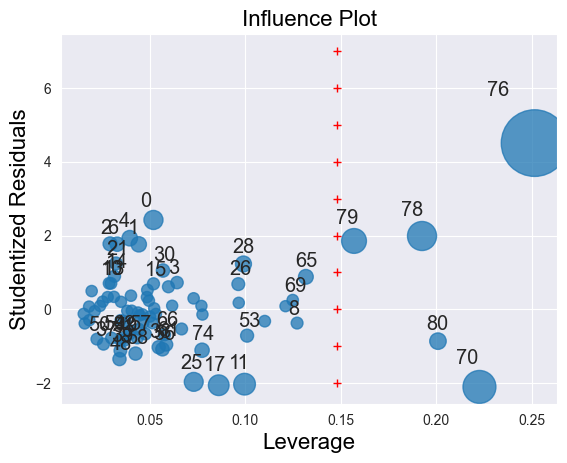

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1,alpha = 0.5)
y=[i for i in range(-2,8)]
x = [leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [32]:
cars[cars.index.isin([65,70,78,79,90])]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733


In [33]:
cars2 = cars.drop(cars.index[[65,70,76,78,80]],axis=0).reset_index(drop=True)
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837
74,238,115,150.576579,19.197888


In [34]:
model3 = smf.ols('MPG~VOL+SP+HP',data = cars2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.99e-29
Time:                        10:53:22   Log-Likelihood:                -201.98
No. Observations:                  76   AIC:                             412.0
Df Residuals:                      72   BIC:                             421.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5094     13.579      0.258      0.797     -23.560      30.579
VOL           -0.1192      0.024     -4.874      0.000      -0.168      -0.070
SP             0.6416      0.145      4.436      0.000       0.353       0.930
HP            -0.3076      0.039     -7.887      0.000      -0.385      -0.230
==============================================================================
Omnibus:                       24.751   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.634
Skew:                           1.324   Prob(JB):                     6.73e-09
Kurtosis:                       5.207   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#build model 3 on cars2 dataset

In [36]:
df3 = pd.DataFrame()
df3["actual_y3"] = cars2["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [38]:
pred_y3 = model3.predict(cars2.iloc[:,0:3])
df3["pred_y3"] = pred_y3
df3.head()


,actual_y3,pred_y3
0,53.700681,44.668003
1,50.013401,43.283099
2,50.013401,43.283099
3,45.696322,43.801299
4,50.504232,43.256779


In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df3["actual_y3"],df3["pred_y3"])
print(mse)
print(np.sqrt(mse))

11.90968654590803
3.4510413712252177


#### Comparison of models

- | Metric          |  Model 1  |  model 2   |  Model3  |
- |-----------------------------------------------------|
- |  R-squared      |  0.771    |   0.770    |  0.880   |
- | Adj- R _squared |  0.758    |  0.761     |  0.880   |
- | MSE	          |  18.89	  |   18.91	   |   8.68   |
- | RMSE            |	4.34      |  4.34	   |  2.94    |
- From the above comparison table it is observed that model3 is the best among all coz Rsquare value is the highest and error is missed

In [40]:
model3.resid


0      9.032678
1      6.730302
2      6.730302
3      1.895024
4      7.247453
        ...    
71    -2.292975
72    -4.160000
73    -0.773757
74     6.008940
75    13.513879
Length: 76, dtype: float64

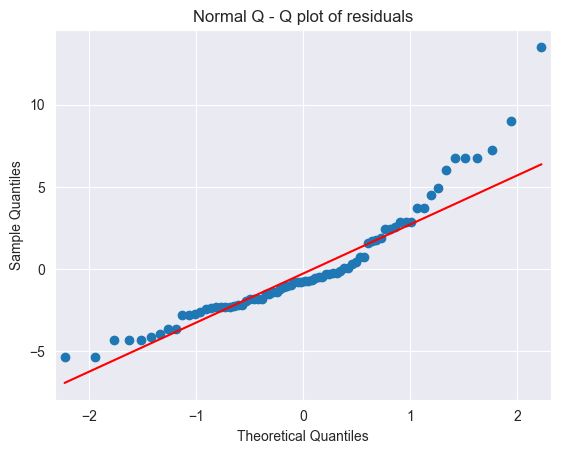

In [41]:
#model is built with VOl, SP , HP by ignoring WT

import statsmodels.api as sm
qqplot= sm.qqplot(model3.resid, line='q')
plt.title("Normal Q - Q plot of residuals")
plt.show()

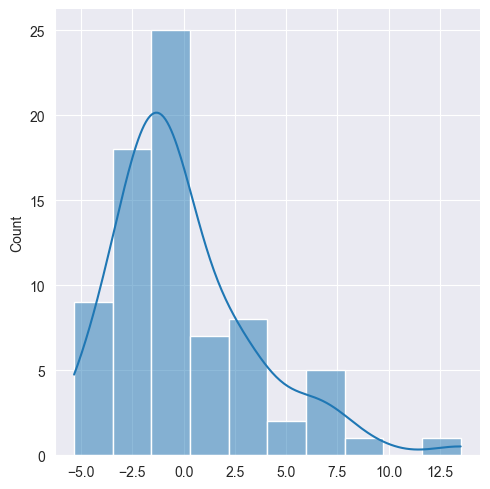

In [42]:
sns.displot(model3.resid, kde = True )


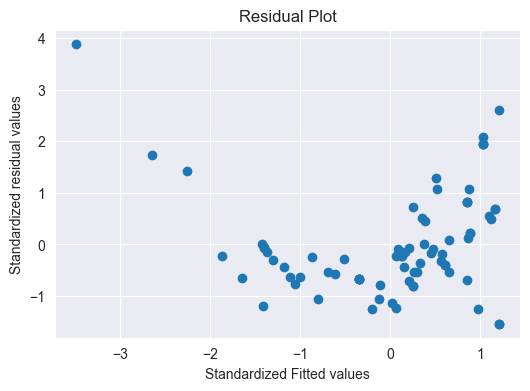

In [43]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()



plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()